# NYC Rats

In [197]:
### data analysis and wrangling
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import random as rnd
from decimal import *
from datetime import datetime  
from datetime import timedelta
%matplotlib notebook

### visualization
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from mpl_toolkits.basemap import Basemap



In [8]:
### Load dataset rat sightings from 09/04/2015 to 02/15/2017
dataset_sightings = pd.read_csv("Rat_Sightings.csv",low_memory=False)
### Load dataset rat interventions from 10/14/2019 to 01/26/2018
dataset_intervention = pd.read_csv("Rodent_Inspection.csv",low_memory=False)


In [9]:
# dataset_sightings.head()
# dataset_intervention.head()

In [10]:
# dataset_sightings.groupby('Descriptor').size()  #check that all sightings are indeed Rat Sighting

In [11]:
# dataset_sightings.info()

In [148]:
### Data cleansing
dataset_sightings['Created Date'] = pd.to_datetime(dataset_sightings['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
dataset_sightings['YearMonth'] = dataset_sightings['Created Date'].map(lambda x: x.strftime('%Y-%m'))
dataset_sightings_locations = dataset_sightings.iloc[:,[1,49,50,52]]

dataset_sightings_locations = dataset_sightings_locations.dropna()

dataset_intervention['INSPECTION_DATE'] = pd.to_datetime(dataset_intervention['INSPECTION_DATE'], format='%m/%d/%Y %I:%M:%S %p')
intervention_types = dataset_intervention.groupby('INSPECTION_TYPE')
intervention_types_numbers = intervention_types.size()
bait_interventions = intervention_types.get_group('BAIT')
bait_interventions = bait_interventions.groupby('RESULT').get_group('Bait applied') ###where bait was actually applied
bait_interventions = bait_interventions.dropna()

bait_interventions['YearMonth'] = bait_interventions['INSPECTION_DATE'].map(lambda x: x.strftime('%Y-%m'))
### getting rid of years that don't overlap with data in the sightings dataset 
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-01']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-07']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-10']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-11']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-12']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2018-12']

<IPython.core.display.Javascript object>


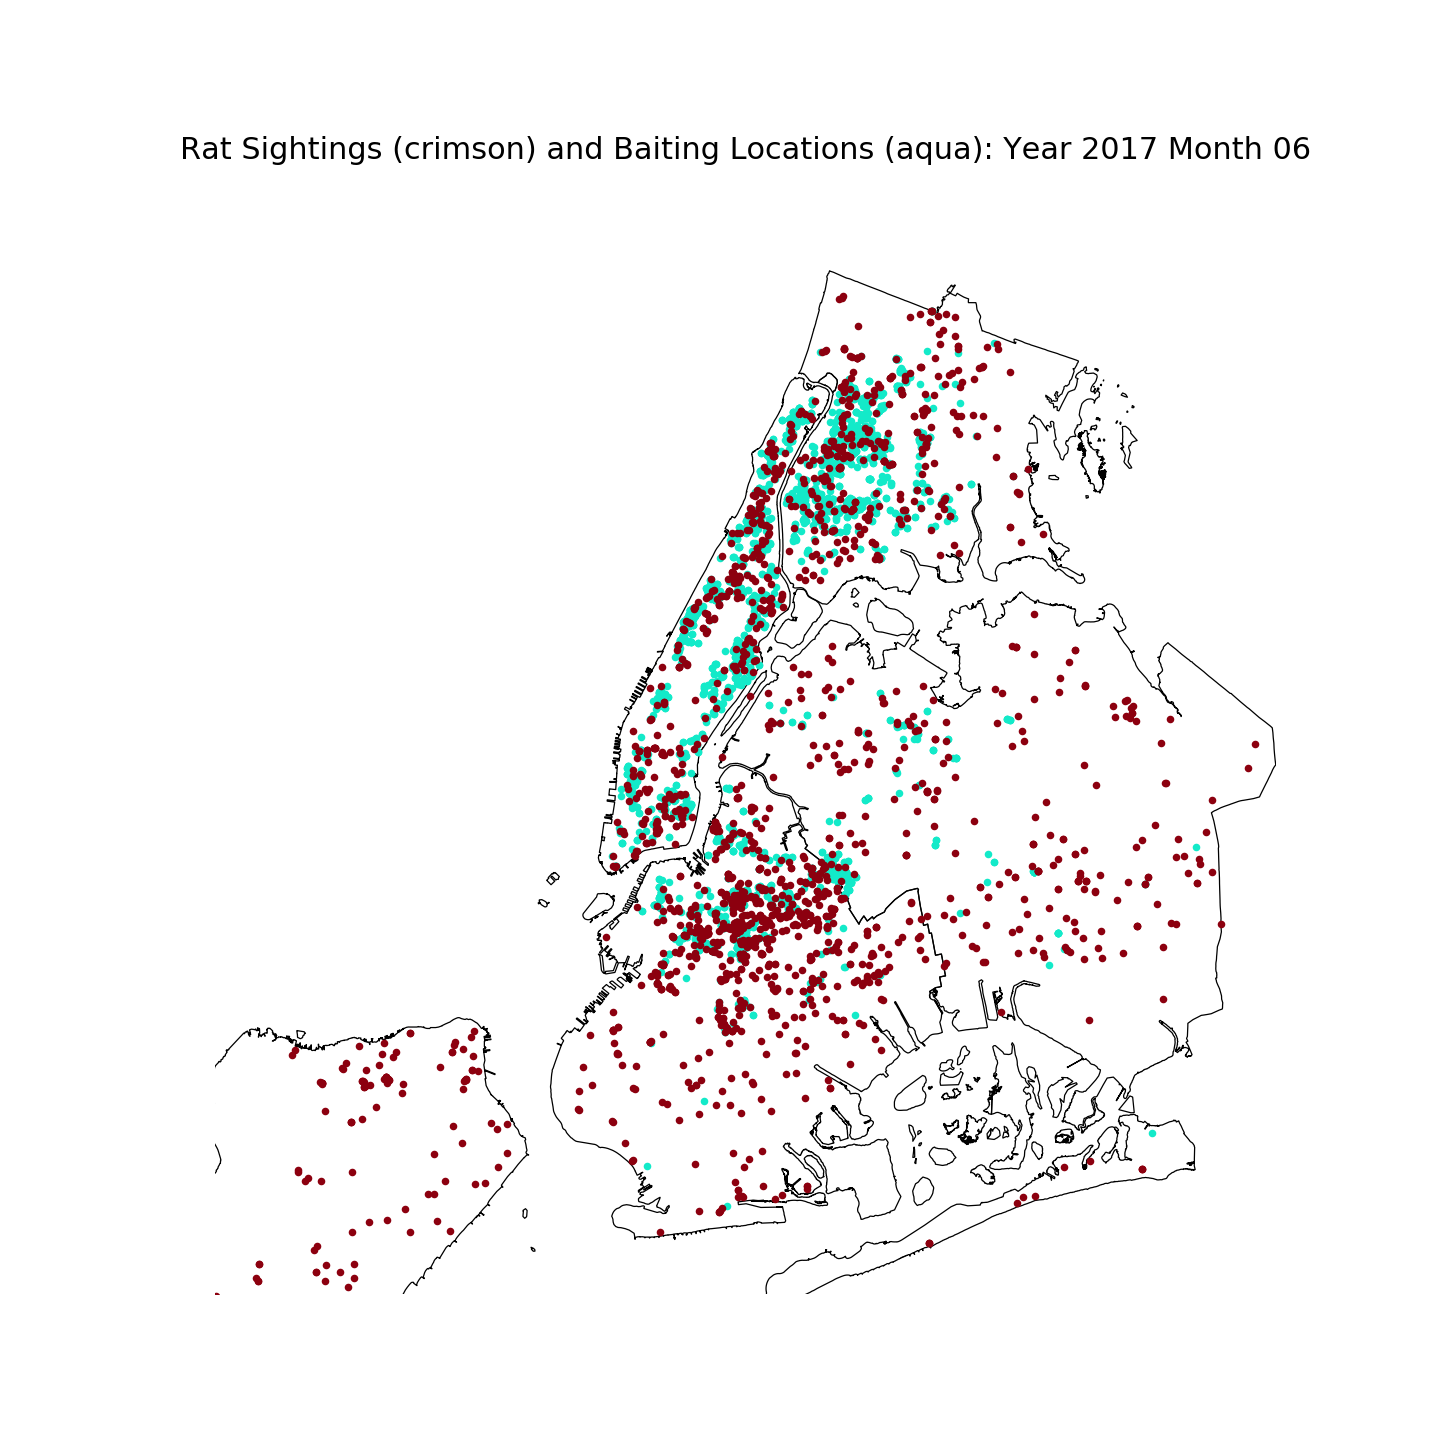

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [149]:
anim_data_sightings = dataset_sightings_locations.groupby('YearMonth') 
anim_data_bait = bait_interventions.groupby('YearMonth')

timepoints = dataset_sightings_locations['YearMonth'].unique()
timepoints.sort()
 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

m = Basemap(llcrnrlat=40.55,urcrnrlat=40.95,llcrnrlon=-74.2, urcrnrlon=-73.7, lat_ts=40.5, resolution='c', projection='merc')
m.readshapefile('geo_export_466a4803-d862-4a61-914b-7783568f80f5', 'comarques')
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

xi,yi = m(0, 0)
pointi = m.plot(xi, yi, 'ro', markersize=2, color = 'xkcd:aqua')[0]

x,y = m(0, 0)
point = m.plot(x, y, 'ro', markersize=2, color = 'xkcd:crimson')[0]



def init():
    pointi.set_data([], [])
    return pointi, point,

def animate(i):
    xi, yi = m(anim_data_bait.get_group(timepoints[i]).LONGITUDE.tolist(), anim_data_bait.get_group(timepoints[i]).LATITUDE.tolist())
    pointi.set_data(xi, yi)
    x, y = m(anim_data_sightings.get_group(timepoints[i]).Longitude.tolist(), anim_data_sightings.get_group(timepoints[i]).Latitude.tolist())
    point.set_data(x, y)
    plt.title('Rat Sightings (crimson) and Baiting Locations (aqua): Year ' + str(anim_data_sightings.get_group(timepoints[i]).iloc[0,0].year) + ' Month '+ str(anim_data_sightings.get_group(timepoints[i]).iloc[0,0].month).zfill(2))
#     ###frames for makeing a gif:
#     plt.savefig('RatSightingsBaiting'+ str(i).zfill(2) +'.jpg', dpi=200)
    return pointi, point,

anim_bait = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(timepoints)-1, interval=100, blit=True,repeat = False, save_count=len(timepoints))

plt.show()



<IPython.core.display.Javascript object>


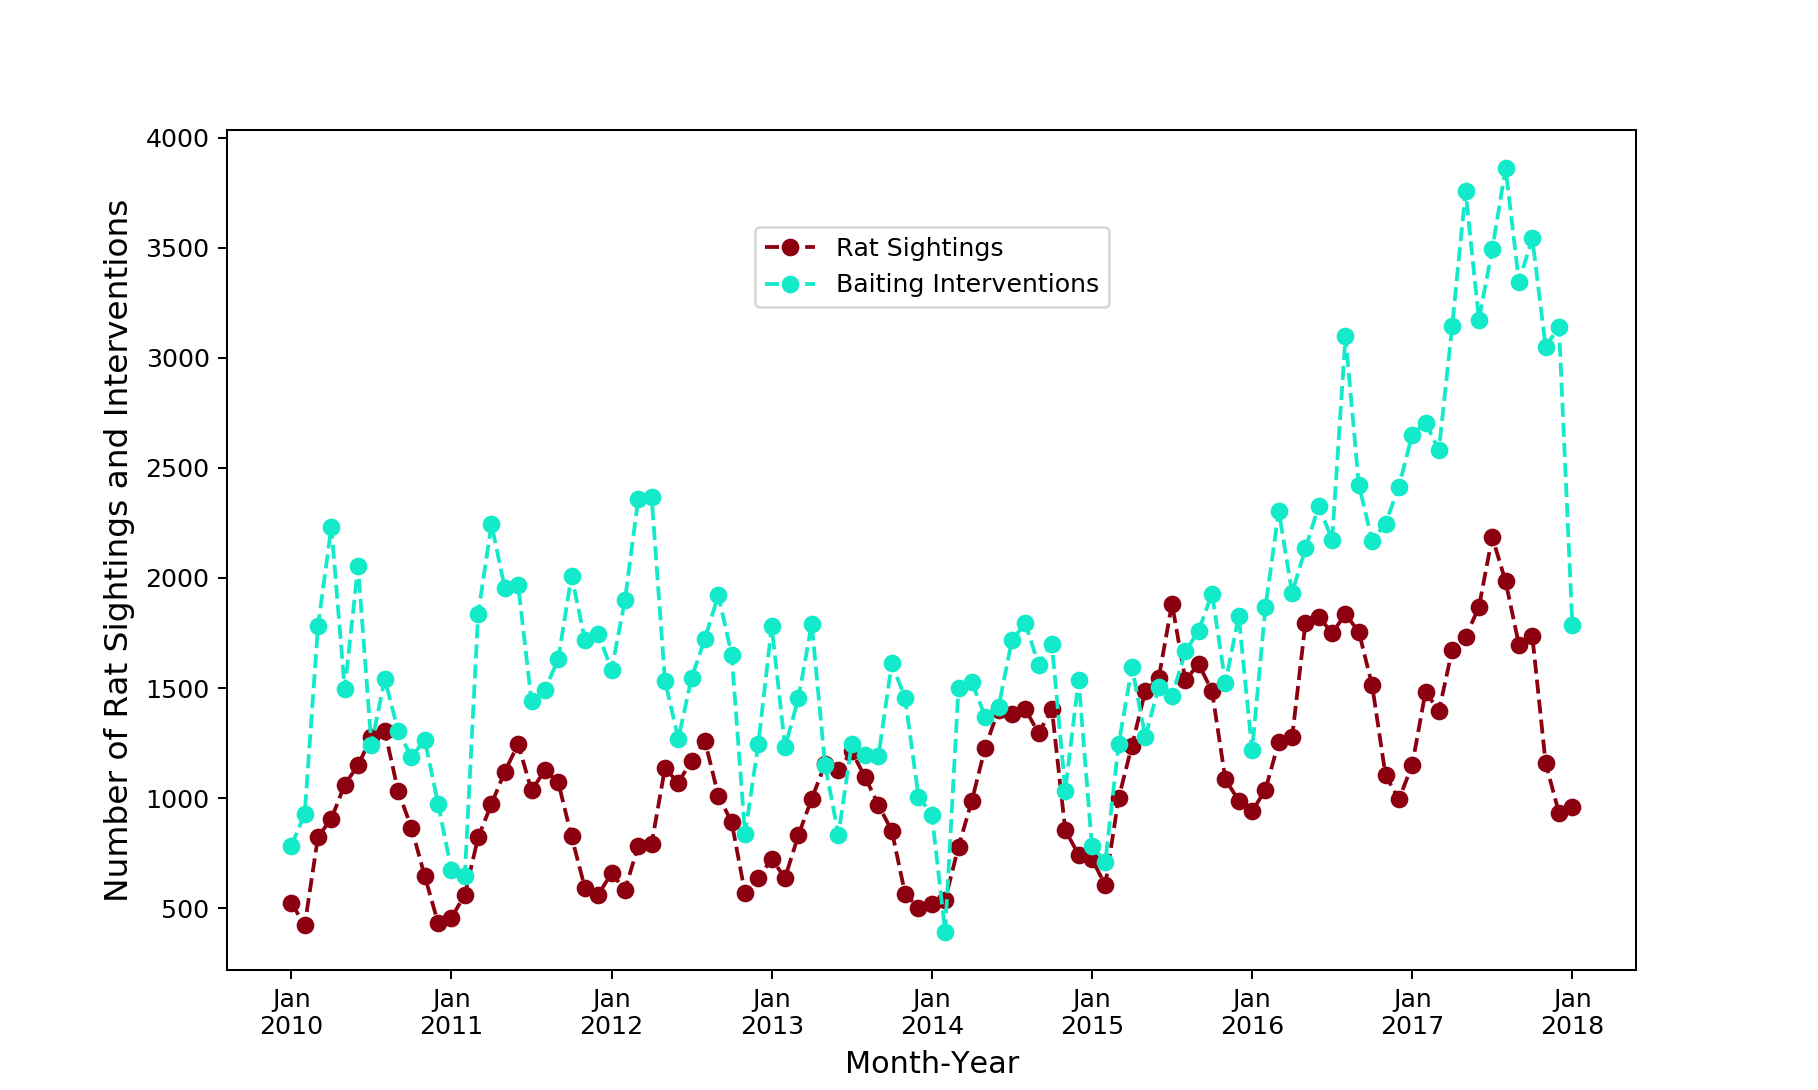

In [152]:
#total number of sightings and baiting interventions as a function of time
fig = plt.figure(figsize=(10, 6))
num_sightings = anim_data_sightings.size().values
num_baitings = anim_data_bait.size().values

plt.plot(timepoints[:-1],num_sightings[:-1],linestyle='--', marker='o',color = 'xkcd:crimson',label="Rat Sightings")
plt.plot(timepoints[:-1],num_baitings,linestyle='--', marker='o',color = 'xkcd:aqua', label="Baiting Interventions")
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Rat Sightings and Interventions", fontsize=13)
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01'],
           ["Jan\n2010","Jan\n2011","Jan\n2012","Jan\n2013","Jan\n2014","Jan\n2015","Jan\n2016","Jan\n2017","Jan\n2018"])
plt.legend(loc=9, bbox_to_anchor=(0.5, 0.9))
plt.savefig('RatSightingsBaiting.jpg', dpi=200)
plt.show()


In [175]:
### making a year-month-day datetime column for baiting dataset
bait_interventions['YearMonthDay'] = bait_interventions['INSPECTION_DATE'].map(lambda x: x.strftime('%Y-%m-%d'))
bait_interventions['YearMonthDay'] = pd.to_datetime(bait_interventions['YearMonthDay'], format='%Y-%m-%d')

### making a year-month-day datetime column for sightings dataset
dataset_sightings_locations['YearMonthDay'] = dataset_sightings_locations['Created Date'].map(lambda x: x.strftime('%Y-%m-%d'))
dataset_sightings_locations['YearMonthDay'] = pd.to_datetime(dataset_sightings_locations['YearMonthDay'], format='%Y-%m-%d')

# intervention_days = bait_interventions['YearMonthDay'].unique()
# bait_interventions.groupby('YearMonthDay').get_group(intervention_days[i])

In [ ]:
sighting_days_group = dataset_sightings_locations.groupby('YearMonthDay')
sq_size = 0.004 ### size of area in which I look at rat sightings around a baiting intervention, around 5 blocks

final = pd.DataFrame({'RelativeTime': list(range(-14, 29))})
count = 0

for name, group in bait_interventions.groupby('YearMonthDay'):
    ### sightings_this_time_interval = sightings bewteen 2 weeks before and 4 weeks after time *name*:
    sightings_this_time_interval = dataset_sightings_locations[(dataset_sightings_locations['YearMonthDay'] >= name - timedelta(days=14)) & (dataset_sightings_locations['YearMonthDay'] <= name + timedelta(days=28))]
    
    count += 1
    if count < 2000:
        ### now check over all locations of baiting intervention at time *name*:
        for i in range(0,group.shape[0]):
            bait_locations = group.iloc[i,[13,14]].values ### Longitude and Latitude of baiting intervention i on day *name*
            ### sightings_in_sq = rat sightings in square area around a baiting intervention in 2 weeks before and 4 weeks after time *name*:
            sightings_in_sq = sightings_this_time_interval[(sightings_this_time_interval['Latitude'] >= bait_locations[0] - sq_size/2) & (sightings_this_time_interval['Latitude'] <= bait_locations[0] + sq_size/2)]
            sightings_in_sq = sightings_in_sq[(sightings_in_sq['Longitude'] >= bait_locations[1] - sq_size/2) & (sightings_in_sq['Longitude'] <= bait_locations[1] + sq_size/2)]
            ### sightings_in_sq_day_groups = sightings grouped by day
            sightings_in_sq_day_groups = sightings_in_sq.groupby('YearMonthDay')
            if sightings_in_sq_day_groups.size().sum() > 0:
                ### sightings_in_sq_final = number of sightings grouped by day and normalized by total number of sightings in that whole time interval
                sightings_in_sq_final = (sightings_in_sq_day_groups.size()/sightings_in_sq_day_groups.size().sum()).reset_index()
                ### creating relative time in 'RelativeTime' column
                sightings_in_sq_final['RelativeTime'] = sightings_in_sq_final['YearMonthDay'] - name
                sightings_in_sq_final['RelativeTime'] = sightings_in_sq_final['RelativeTime'].map(lambda x: x.days)
                ### final = a dataframe with normalized number of sightings measured in relative time in square around baiting intervention
                final = pd.merge(final, sightings_in_sq_final.iloc[:,1:3], on='RelativeTime', how='left')


In [588]:
### ok_columns = columns with more than 10 entries:
ok_columns = np.nonzero(final.count().values > 10)
final_cleaned = final.iloc[:,ok_columns[0]]
final_cleaned['avg'] = final_cleaned.iloc[:,1:].mean(axis=1)
### average over weeks
final_cleaned['week_id'] = [-2,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3]
final_over_weeks = final_cleaned.groupby('week_id')['avg'].aggregate([np.sum]).reset_index()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>


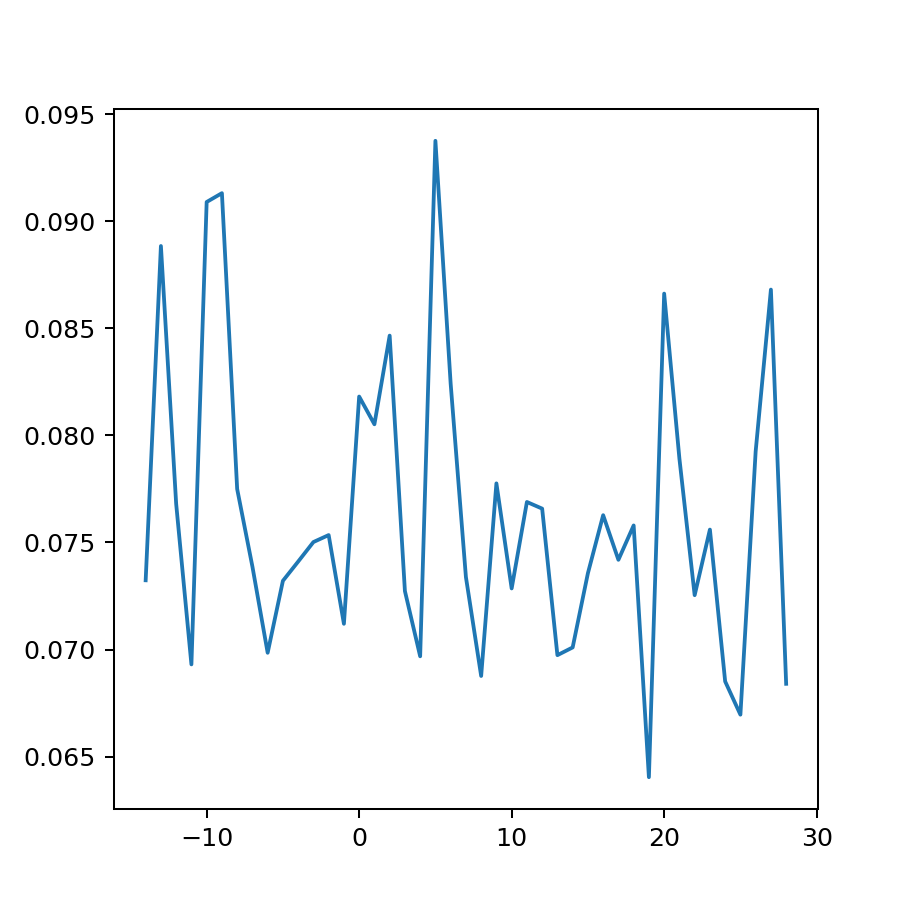

In [583]:
fig = plt.figure(figsize=(5, 5))
plt.plot(final_cleaned['RelativeTime'].values,final_cleaned['avg'].values)
plt.show()

<IPython.core.display.Javascript object>


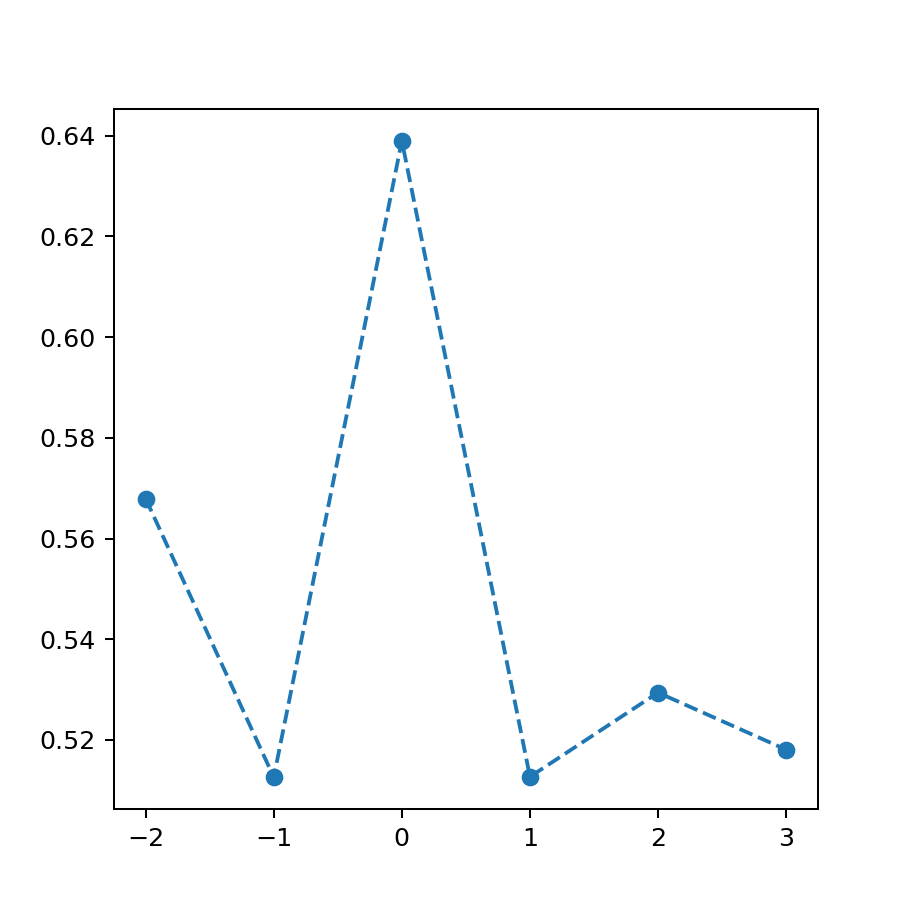

In [584]:
fig = plt.figure(figsize=(5, 5))
plt.plot([-2,-1,0,1,2,3],final_over_weeks['sum'].values, linestyle='--', marker='o')
plt.show()

In [537]:
(final_cleaned['avg'].values[16:]).mean()

0.075438153705906438

In [518]:
np.nonzero(final.count().values > 10)

(array([    0,  2032,  3200,  3201,  3205,  4284,  4287,  4362,  4403,
         4414,  4416,  4435,  4455,  4456,  4457,  4458,  4459,  4460,
         4461,  4501,  4653,  4654,  4655,  4757,  4758,  4759,  4784,
         4805,  4863,  4902,  4924,  5490,  5492,  5493,  5497,  5501,
         5604,  5652,  5662,  5691,  5845,  5846,  5847,  5848,  5854,
         5858,  6154,  6155,  6156,  6157,  6158,  6553,  6554,  6697,
         6700,  6742,  6743,  6744,  6745,  6746,  6747,  6748,  6749,
         6750,  6801,  6936,  6937,  6938,  6939,  6940,  6997,  7079,
         7080,  7081,  7253,  7254,  7378,  7379,  7380,  7381,  7382,
         7383,  7384,  7612,  7613,  7702,  7787,  7832,  8065,  8832,
         8833,  8834, 12454, 12578, 12579, 12753, 12754, 12755, 12792,
        12822, 13107, 13147, 13205, 13206, 13349, 13350, 13454, 13456,
        13457, 13458, 13476, 13477, 13478, 13656, 13657, 13800, 13810,
        13811, 13812, 13831, 13832, 14085, 14126, 14127, 14128, 14145,
      

In [551]:
len([-2,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3])


43